

---



---



---


# Implementing Object Detection with YOLO Algorithm

---



---



---



# Libraries Imports

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 9.6 MB/s eta 0:00:00


In [ ]:
import cv2
import urllib.request
import cv2
import torch
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import requests
import urllib.request
import numpy as np

# 1. Loading Data and model


*   Dataset: Common Objects in Context (COCO).
*   Model: YOLOv8s





In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)

# Train the model with custom optimizer settings
results = model.train( data='coco8.yaml',
                       epochs=20,
                       batch=16,
                       imgsz=640,
                       optimizer='SGD',  # Specify the optimizer (e.g., 'SGD', 'Adam', 'AdamW')
                       lr0=0.01,  # Initial learning rate
                       lrf=0.01,  # Final learning rate (fraction of lr0)
                       momentum=0.937,  # Momentum
                       weight_decay=0.0005,  # Weight decay
                       warmup_epochs=3.0,  # Warmup epochs (fractions ok)
                       warmup_momentum=0.8,  # Warmup initial momentum
                       warmup_bias_lr=0.1,  # Warmup initial bias lr
                       )

100%|██████████| 21.5M/21.5M [00:00<00:00, 263MB/s]


Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=coco8.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 433k/433k [00:00<00:00, 17.1MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 2957.57file/s]

Dataset download success ✅ (1.4s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 6.23M/6.23M [00:00<00:00, 120MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 304.61it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 889.14it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.45G     0.9721      2.785      1.388         25        640: 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all          4         17      0.874      0.925      0.946      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.33G      1.022      2.321      1.352         36        640: 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all          4         17      0.877      0.924      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.33G      1.302      2.186      1.378         27        640: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all          4         17      0.818      0.918      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.33G     0.9133      1.905      1.132         21        640: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.71it/s]

                   all          4         17      0.808      0.915      0.943      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.34G      1.076      2.723      1.406         22        640: 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.11it/s]

                   all          4         17       0.81      0.912      0.945      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.38G      0.644      1.831      1.113         22        640: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.10it/s]

                   all          4         17       0.81      0.906      0.946      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.38G       1.34      3.279      1.655         38        640: 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.98it/s]

                   all          4         17      0.808      0.901      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.38G     0.8667       2.21      1.321         23        640: 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.01it/s]

                   all          4         17      0.815      0.884      0.947      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.38G     0.6015       2.02      1.053         17        640: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.31it/s]

                   all          4         17      0.818      0.878      0.952       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.38G      1.187      2.122      1.588         28        640: 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.40it/s]

                   all          4         17      0.829      0.866      0.951      0.681


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.38G      1.167      2.442      1.318         13        640: 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all          4         17      0.785       0.85      0.914      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.38G     0.8345      1.065      1.167         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all          4         17       0.77       0.85      0.918      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.38G       0.64     0.9546     0.9773         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all          4         17      0.766       0.85       0.89      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.38G     0.6567      1.444     0.9252         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.31it/s]

                   all          4         17      0.769       0.85      0.896      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.38G      0.788      1.237      1.184         13        640: 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.59it/s]

                   all          4         17      0.817       0.85      0.869      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.38G     0.7275     0.8476     0.9979         13        640: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.45it/s]

                   all          4         17      0.754       0.85      0.906      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.38G     0.9144      1.085      1.281         13        640: 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.63it/s]

                   all          4         17      0.757       0.85      0.905      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.38G     0.7622      1.267     0.9839         13        640: 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.77it/s]

                   all          4         17      0.757       0.85      0.905      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.35G     0.7479      1.189      1.178         13        640: 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.33it/s]

                   all          4         17      0.703       0.85      0.864      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.38G     0.6273     0.5937      1.054         13        640: 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.37it/s]

                   all          4         17      0.703       0.85      0.864      0.677



20 epochs completed in 0.006 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.19it/s]


                   all          4         17      0.874      0.925      0.946      0.727
                person          4         10      0.856        0.6      0.699      0.372
                   dog          4          1      0.902          1      0.995      0.796
                 horse          4          2      0.798          1      0.995        0.8
              elephant          4          2          1      0.948      0.995        0.6
              umbrella          4          1       0.69          1      0.995      0.895
          potted plant          4          1          1          1      0.995      0.895
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


# 2. Evaluation of YOLO Model

**Measure detection:**


*   precision: 0.874
*   recall: 0.925

***Other relevant metrics to assess model performance: ***


*   mAP50: 0.946
*   mAP50-95: 0.727



In [ ]:
# Evaluate the model on a separate validation dataset
val_results = model.val(verbose=True,
                        save_json=True,
                        save_conf=True,
                        save_txt=True,
                        plots=True,)

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs


val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


                   all          4         17      0.874      0.925      0.946      0.727
                person          4         10      0.856        0.6      0.699      0.372
                   dog          4          1      0.902          1      0.995      0.796
                 horse          4          2      0.798          1      0.995        0.8
              elephant          4          2          1      0.949      0.995        0.6
              umbrella          4          1      0.691          1      0.995      0.895
          potted plant          4          1          1          1      0.995      0.895
Speed: 0.3ms preprocess, 62.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Saving runs/detect/train2/predictions.json...
Results saved to runs/detect/train2


In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all          4         17      0.874      0.925      0.946      0.727
                person          4         10      0.856        0.6      0.699      0.372
                   dog          4          1      0.902          1      0.995      0.796
                 horse          4          2      0.798          1      0.995        0.8
              elephant          4          2          1      0.949      0.995        0.6
              umbrella          4          1      0.691          1      0.995      0.895
          potted plant          4          1          1          1      0.995      0.895
Speed: 0.3ms preprocess, 8.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train3


array([    0.37201,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,       0.796,     0.80037,     0.72655,     0.72655,     0.59992,     0.72655,     0.72655,     0.72655,
           0.72655,      0.8955,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,
           0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,      0.8955,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,     0.72655,
           0.72655,     0.72655,     0.7265

### Model summary

In [ ]:
# Load a pretrained model nano
model = YOLO('yolov8n.pt')

# Train the model
results = model.train(data='coco8.yaml',
                      epochs=20,
                      imgsz=640,)

# Evaluate the trained model on a validation dataset
val_results = model.val(verbose=True,
                        save_json=True,
                        save_conf=True,
                        save_txt=True,
                        plots=True,)

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

train: Scanning /content/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.954G      1.039      3.145      1.498         25        640: 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all          4         17       0.62      0.885      0.888      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.916G      1.166      2.779       1.44         36        640: 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          4         17      0.597      0.903      0.888      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.919G      1.341      2.336      1.459         27        640: 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          4         17      0.589       0.89      0.888      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.919G      1.097      1.627      1.304         21        640: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.03it/s]

                   all          4         17      0.543      0.853      0.874      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.946G       1.49      3.368      1.712         22        640: 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.59it/s]

                   all          4         17      0.566      0.833      0.872      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      0.94G     0.8297      2.593      1.243         22        640: 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.78it/s]

                   all          4         17      0.669       0.75      0.885      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.942G      1.534      3.236      1.775         38        640: 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.94it/s]

                   all          4         17      0.835      0.567      0.885      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.942G      1.245      2.572      1.589         23        640: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all          4         17      0.815      0.568      0.884      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      0.94G     0.6549       3.47      1.097         17        640: 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.21it/s]

                   all          4         17      0.814      0.578      0.884      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.942G      1.141      2.779      1.505         28        640: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.37it/s]

                   all          4         17      0.808      0.583      0.779      0.546


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      0.94G      1.208      2.054      1.368         13        640: 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all          4         17      0.814       0.58      0.746      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.942G     0.9869      2.066      1.374         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all          4         17      0.801      0.583      0.743      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      0.94G     0.8492      1.496       1.18         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all          4         17      0.796      0.583      0.743      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      0.94G      1.021      1.672      1.195         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.93it/s]

                   all          4         17      0.776      0.583      0.739      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.942G     0.8475      1.649      1.226         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.55it/s]

                   all          4         17       0.74      0.583      0.742      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      0.94G     0.8987      1.703      1.206         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.56it/s]

                   all          4         17      0.735      0.583       0.74      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.942G     0.8728      2.289       1.26         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.36it/s]

                   all          4         17      0.712      0.583       0.74      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      0.94G      1.152      1.868      1.299         13        640: 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.44it/s]

                   all          4         17      0.712      0.583       0.74      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.952G     0.8237      1.912      1.264         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.47it/s]

                   all          4         17      0.727      0.583      0.743      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.942G     0.7903       1.69      1.206         13        640: 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.03it/s]

                   all          4         17      0.727      0.583      0.743      0.573



20 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.22it/s]


                   all          4         17      0.618      0.883      0.888      0.622
                person          4         10      0.671        0.5      0.521      0.278
                   dog          4          1      0.365          1      0.995      0.597
                 horse          4          2      0.729          1      0.995      0.631
              elephant          4          2        0.6        0.8      0.828      0.332
              umbrella          4          1      0.554          1      0.995      0.995
          potted plant          4          1       0.79          1      0.995      0.895
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train6
Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


                   all          4         17       0.62      0.883      0.888      0.621
                person          4         10      0.674        0.5      0.519      0.278
                   dog          4          1      0.366          1      0.995      0.597
                 horse          4          2      0.732          1      0.995      0.631
              elephant          4          2        0.6        0.8      0.828      0.332
              umbrella          4          1      0.555          1      0.995      0.995
          potted plant          4          1      0.793          1      0.995      0.895
Speed: 0.3ms preprocess, 5.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Saving runs/detect/train62/predictions.json...
Results saved to runs/detect/train62


In [ ]:
# Display model layers
for name, module in model.named_modules():
    print(name)


model
model.model
model.model.0
model.model.0.conv
model.model.0.act
model.model.1
model.model.1.conv
model.model.2
model.model.2.cv1
model.model.2.cv1.conv
model.model.2.cv2
model.model.2.cv2.conv
model.model.2.m
model.model.2.m.0
model.model.2.m.0.cv1
model.model.2.m.0.cv1.conv
model.model.2.m.0.cv2
model.model.2.m.0.cv2.conv
model.model.3
model.model.3.conv
model.model.4
model.model.4.cv1
model.model.4.cv1.conv
model.model.4.cv2
model.model.4.cv2.conv
model.model.4.m
model.model.4.m.0
model.model.4.m.0.cv1
model.model.4.m.0.cv1.conv
model.model.4.m.0.cv2
model.model.4.m.0.cv2.conv
model.model.4.m.1
model.model.4.m.1.cv1
model.model.4.m.1.cv1.conv
model.model.4.m.1.cv2
model.model.4.m.1.cv2.conv
model.model.5
model.model.5.conv
model.model.6
model.model.6.cv1
model.model.6.cv1.conv
model.model.6.cv2
model.model.6.cv2.conv
model.model.6.m
model.model.6.m.0
model.model.6.m.0.cv1
model.model.6.m.0.cv1.conv
model.model.6.m.0.cv2
model.model.6.m.0.cv2.conv
model.model.6.m.1
model.model.6

# 4. Model Optimization and Speed Improvement:

• Explore techniques for optimizing the pretrained YOLO model for speed and efficiency.
• Experiment with model compression, pruning to reduce inference time while maintaining performance.

In [ ]:
import torch
from torch.nn.utils import prune

# Load your model
model = YOLO('content/yolov8n.pt')
ratio=0.5

for name, module in model.named_modules():
    if "cv1.conv" in name:  # Check if the layer name contains "cv1"
        print(f"Pruning layer: {name}")
        prune.l1_unstructured(module, name='weight', amount=ratio)  # Prune the 'conv' submodule
        prune.remove(module, 'weight')  #Apply pruning permanently

# Save the pruned model
torch.save(model.state_dict(), 'pruned_model.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 113MB/s]


Pruning layer: model.model.2.cv1.conv
Pruning layer: model.model.2.m.0.cv1.conv
Pruning layer: model.model.4.cv1.conv
Pruning layer: model.model.4.m.0.cv1.conv
Pruning layer: model.model.4.m.1.cv1.conv
Pruning layer: model.model.6.cv1.conv
Pruning layer: model.model.6.m.0.cv1.conv
Pruning layer: model.model.6.m.1.cv1.conv
Pruning layer: model.model.8.cv1.conv
Pruning layer: model.model.8.m.0.cv1.conv
Pruning layer: model.model.9.cv1.conv
Pruning layer: model.model.12.cv1.conv
Pruning layer: model.model.12.m.0.cv1.conv
Pruning layer: model.model.15.cv1.conv
Pruning layer: model.model.15.m.0.cv1.conv
Pruning layer: model.model.18.cv1.conv
Pruning layer: model.model.18.m.0.cv1.conv
Pruning layer: model.model.21.cv1.conv
Pruning layer: model.model.21.m.0.cv1.conv


# 3. Application on Streaming Video:
• Implement YOLO for real-time object detection on streaming video data.

In [ ]:
# URL of the video
url = "https://videos.pexels.com/video-files/5798349/5798349-sd_640_360_30fps.mp4"

# Specify the path where you want to save the video
save_path = "sample_video.mp4"

# Make the GET request to download the video
response = requests.get(url, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Open a local file with write-binary mode
    with open(save_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print("Video downloaded successfully.")
else:
    print("Failed to download the video. Status code:", response.status_code)

Video downloaded successfully.


In [ ]:
def read_video_frames(video_path, num_samples=50):
  # Open the video file
    cap = cv2.VideoCapture(video_path)
    frames = []

    if not cap.isOpened():
        print("Error opening video file")
        return

    # Calculate total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Determine the interval for sampling frames
    if total_frames > num_samples:
        frame_interval = total_frames // num_samples
    else:
        frame_interval = 1  # Take every frame if less than 50 frames are available

    # Capture frames at the determined interval
    for i in range(min(num_samples, total_frames)):
      frame_id = i * frame_interval
      cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
      ret, frame = cap.read()
      if not ret:
          print("Failed to read frame or end of video reached")
          break
      # Resize frame for display purposes
      small_frame = cv2.resize(frame, (640, 480))  # Adjust the size as needed
      frames.append(small_frame)
    # Release the video capture object
    cap.release()
    return frames

def display_video_frames(video_path, num_samples=50):
    frames = read_video_frames(video_path, num_samples)
    # Concatenate images horizontally if there are frames to show
    if frames:
        video_tape = np.hstack(frames)
        cv2_imshow(video_tape)  # Display the concatenated frames
    else:
        print("No frames to display")

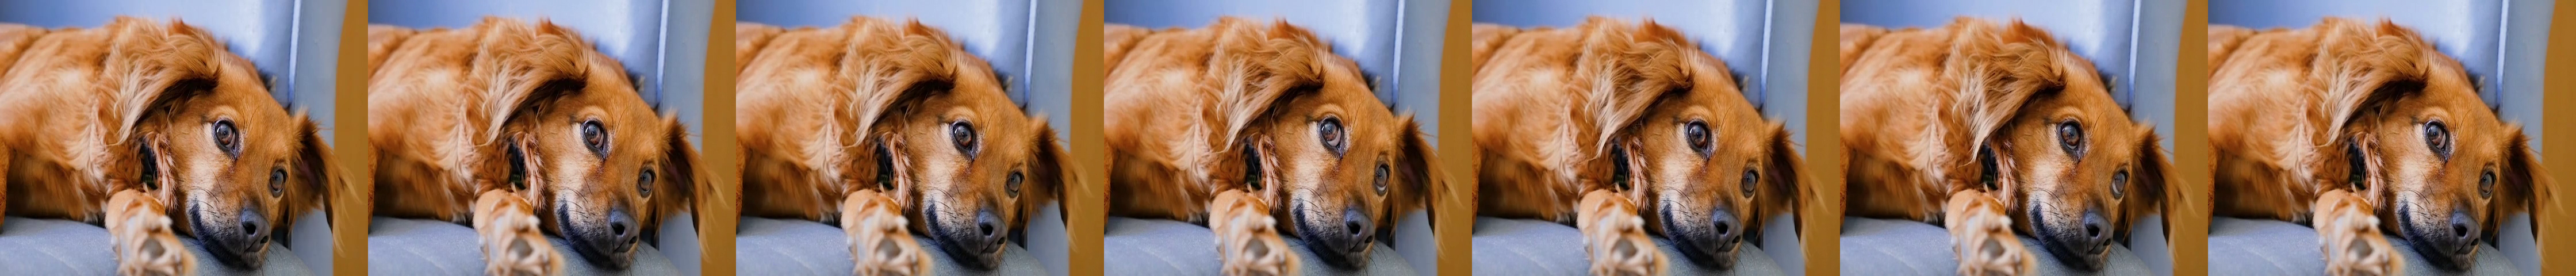

In [ ]:
# Example usage
video_path = '/content/15305-262921865_tiny.mp4'
display_video_frames(video_path, 7)

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-12 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
def detect_and_draw(model, frame):
    # Convert BGR frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(frame_rgb)

    # # Render results (bounding boxes and labels) back onto the frame
    results.render()

    # Convert RGB back to BGR for OpenCV compatibility
    output_frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
    return output_frame

In [ ]:
def process_video(input_video_path, output_video_path):
    # Open the video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID'
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Process each frame
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Detect objects and draw bounding boxes
        processed_frame = detect_and_draw(model, frame)

        # Write the frame into the file 'output_video.mp4'
        out.write(processed_frame)

    # Release everything when job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    return output_video_path


In [ ]:
input_video = '/content/15305-262921865_tiny.mp4'
output_video = '/content/output_video.mp4'
processed_video_path = process_video(input_video, output_video)
print("Processed video saved as:", processed_video_path)

Processed video saved as: /content/output_video.mp4
